<a href="https://colab.research.google.com/github/jaamike/Project1/blob/main/Hotel_Booking_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the Hotel Booking Demand dataset from the Kaggle. The data file 02_hotel_booking.csv has been attached to this assignment. This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, lead time, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Descriptions for every column in the data set has made available with this assignment as well.

##Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data cleansing

In [2]:
booking = pd.read_csv('/content/drive/MyDrive/Assign2/02_hotel_bookings - 02_hotel_bookings.csv')

####Summary Information About Data Set

In [3]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Handling Missing Values

In [5]:
booking.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [6]:
# we use isnull() to check if there are NaNs
# all(axis=1), all() for every values , axis=1 in rows
df1 = booking.isnull().all(axis=1) 

# Count number of True (all NaNs in the rows) 
num_rows = len(df1[df1 == True].index)
# print output 
print('Number of rows with all NaNs = ', num_rows)

Number of rows with all NaNs =  0


In [7]:
# Since we want to fill missing values in every column with 0 except the 'country' and 'children' column.

# 1. we will remove these except 2 columns in another variable (df2).
df2 = booking.drop(['country','children'],axis=1)
# 2. we will fill missing values with 0 in every columns except the 'country' and 'children' 
booking[df2.columns] = booking[df2.columns].fillna(0)
# 3. show that all NaN values in the specified columns have been replaced.
booking.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [8]:
booking.isnull().sum().sort_values(ascending=False)

country                           488
children                            4
hotel                               0
agent                               0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
company                             0
previous_cancellations              0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
previous_bookings_not_canceled      0
is_repeated_guest                   0
is_canceled                         0
distribution_channel                0
market_segment                      0
meal                                0
babies                              0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date

In [9]:
booking['country'] = booking['country'].fillna(booking['country'].mode()[0])
booking['children'] = booking['children'].fillna(round(booking['children'].mean()))

In [10]:
booking['children'] = booking['children'].astype(int)
booking['agent'] = booking['agent'].astype(int)
booking['company'] = booking['company'].astype(int)

In [11]:
booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

####Handling Duplicates

In [12]:
# print how many duplicate rows in the dataframe
print("Number of duplicate rows = ", booking.duplicated().sum())

Number of duplicate rows =  32013


In [13]:
# drop all duplicated rows
booking= booking.drop_duplicates()

# Verify also that all duplicate rows have been removed.
print("Number of duplicate rows = ", booking.duplicated().sum())

Number of duplicate rows =  0


#### Data Validity

In [14]:
sum_rows = booking[['adults','children','babies']].apply(sum,axis=1)
print("Number of rows with total 0 guests = ", (sum_rows == 0).sum())

Number of rows with total 0 guests =  166


In [15]:
w = sum_rows.index[sum_rows == 0]
x = len(sum_rows.loc[sum_rows == 0])

print("Indices of ", x ,"row with total 0 guests are as follows:",w)

Indices of  166 row with total 0 guests are as follows: Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112471, 112558, 113188, 114583, 114908, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=166)


In [17]:
booking = booking.drop(booking[(booking['adults']+booking['children']+booking['babies']) == 0].index)

In [18]:
print("Number of rows with children or babies guests, but zero adults = ", (booking['adults']==0).sum())

Number of rows with children or babies guests, but zero adults =  219


In [19]:
booking =booking.drop(booking[(booking['adults']==0)].index)

In [20]:
hotel_booking_cleaned = booking.to_csv('/content/drive/MyDrive/hotel_booking_cleaned.csv',index=False)

## Exploratory Data Analysis (Part I)

In [22]:
hotel_booking = pd.read_csv('/content/drive/MyDrive/hotel_booking_cleaned.csv')

#### How many booking were cancelled?

out of 86992 booking, There were 23927 which were cancelled.
which account for 27.50 percent.


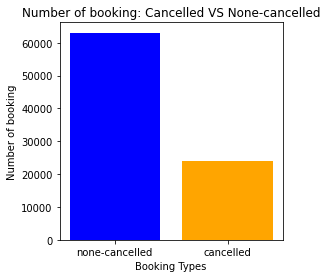

In [23]:
print("out of", len(hotel_booking),'booking, There were', np.count_nonzero(hotel_booking.is_canceled),'which were cancelled.')
print(f"which account for {np.count_nonzero(hotel_booking.is_canceled)/len(hotel_booking)*100:.2f} percent.")

# Plot
vs = {"none-cancelled": len(hotel_booking) - np.count_nonzero(hotel_booking.is_canceled),
      "cancelled": np.count_nonzero(hotel_booking.is_canceled)}

fig, ax = plt.subplots(figsize=(4,4))
ax.bar(vs.keys(), vs.values(),color=["b", "orange"])
ax.set(title="Number of booking: Cancelled VS None-cancelled",
       xlabel="Booking Types",
       ylabel="Number of booking");

#### What is the booking ratio between Resort Hotel and City Hotel?

The booking ratio between resort hotels and city hotels is 41.17 % and 58.83 %


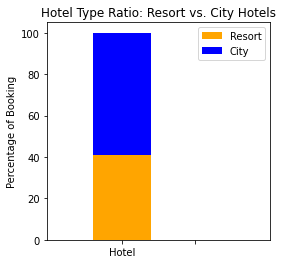

In [24]:
tt =len(hotel_booking[hotel_booking['reservation_status']=='Check-Out'])
resort = round((len(hotel_booking[(hotel_booking['hotel']=='Resort Hotel') & (hotel_booking['reservation_status']=='Check-Out')]))/tt*100,2)
city = round((len(hotel_booking[(hotel_booking['hotel']=='City Hotel') & (hotel_booking['reservation_status']=='Check-Out')]))/tt*100,2)
print("The booking ratio between resort hotels and city hotels is",resort,"% and", city,"%")
# Plot 
x = ['Hotel','']
rss = [resort,0]
ctt = [city,0]
fig, ax = plt.subplots(figsize=(4,4))
plt.bar(x, rss,width=0.8,color='orange')
plt.bar(x, ctt,bottom=resort, width=0.8,color='b')
plt.ylabel("Percentage of Booking")
plt.legend(["Resort","City"])
plt.title("Hotel Type Ratio: Resort vs. City Hotels")
plt.margins(x=0.35)
plt.show()

#### Let's analyzing hotel booking data for each year

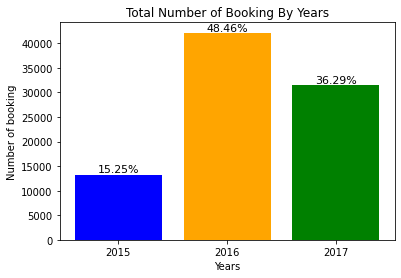

In [25]:
yr = {"2015": len(hotel_booking[hotel_booking.arrival_date_year == 2015]),
      "2016": len(hotel_booking[hotel_booking.arrival_date_year == 2016]),
      "2017": len(hotel_booking[hotel_booking.arrival_date_year == 2017])}

fig, ax = plt.subplots()
p1 = ax.bar(yr.keys(), yr.values(),color=["b", "orange", "green"])
ax.set(title="Total Number of Booking By Years",
       xlabel="Years",
       ylabel="Number of booking");

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{:.2f}%".format(height/len(hotel_booking)*100), (rect1.get_x()+rect1.get_width()/2,height+0.5),ha='center',va='bottom',fontsize=11)
plt.show()

arrival_date_year  is_canceled
2015               0              10570
                   1               2698
2016               0              31005
                   1              11152
2017               0              21490
                   1              10077
Name: is_canceled, dtype: int64


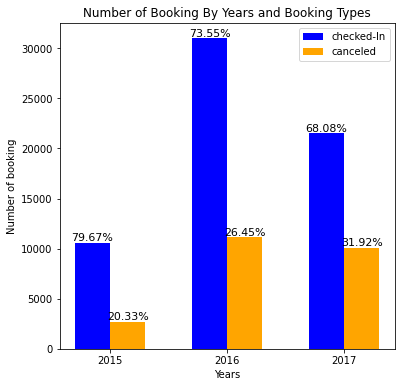

In [26]:
print(hotel_booking.groupby("arrival_date_year")["is_canceled"].value_counts())

X = ['2015','2016','2017']
yy = [ len(hotel_booking[(hotel_booking.arrival_date_year==2015)]),
       len(hotel_booking[(hotel_booking.arrival_date_year==2016)]),
       len(hotel_booking[(hotel_booking.arrival_date_year==2017)])
        ]
check = {'2015': len(hotel_booking[(hotel_booking.arrival_date_year==2015) & (hotel_booking['reservation_status']=='Check-Out')]),
         '2016': len(hotel_booking[(hotel_booking.arrival_date_year==2016) & (hotel_booking['reservation_status']=='Check-Out')]),
         '2017': len(hotel_booking[(hotel_booking.arrival_date_year==2017) & (hotel_booking['reservation_status']=='Check-Out')])
         }
can = {'2015': len(hotel_booking[(hotel_booking.arrival_date_year==2015) & (hotel_booking['reservation_status']!='Check-Out')]),
       '2016': len(hotel_booking[(hotel_booking.arrival_date_year==2016) & (hotel_booking['reservation_status']!='Check-Out')]),
       '2017': len(hotel_booking[(hotel_booking.arrival_date_year==2017) & (hotel_booking['reservation_status']!='Check-Out')])
         }
X_axis = np.arange(len(X))
fig, ax = plt.subplots(figsize=(6,6))
pl1 = ax.bar(X_axis -0.15, check.values(),width=0.3,color='b')
pl2 = ax.bar(X_axis + 0.15, can.values(),width=0.3,color='orange')
ax.set(title="Number of Booking By Years and Booking Types",
       xlabel="Years",
       ylabel="Number of booking")
plt.xticks(X_axis, X)
plt.legend(["checked-In","canceled"],loc='upper right')

i=0
for rect1 in pl1:
    height = rect1.get_height()
    plt.annotate("{:.2f}%".format((height/ yy[i]) *100), (rect1.get_x()+rect1.get_width()/2,height+0.5),ha='center',va='bottom',fontsize=11)
    i+=1
j=0
for rect2 in pl2:
    height = rect2.get_height()
    plt.annotate("{:.2f}%".format((height/yy[j])*100), (rect2.get_x()+rect2.get_width()/2,height+0.5),ha='center',va='bottom',fontsize=11)
    j+=1

plt.show()

#### Compute, print, and plot the number of checked-in booking by years and Hotel Types (City Hotels vs. Resort Hotels)

arrival_date_year  hotel       
2015               City Hotel       5096
                   Resort Hotel     5474
2016               City Hotel      18804
                   Resort Hotel    12201
2017               City Hotel      13201
                   Resort Hotel     8289
Name: hotel, dtype: int64


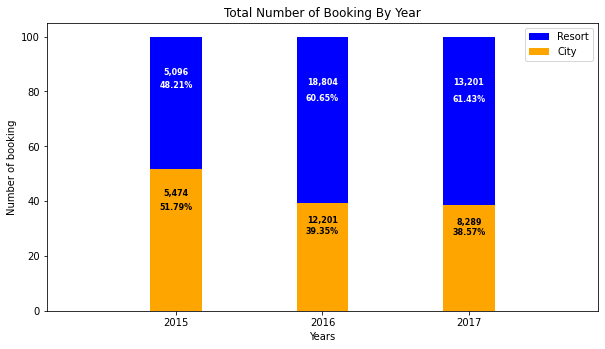

In [27]:
booking = hotel_booking.query('is_canceled == 0').filter(['arrival_date_year','hotel']).groupby(['arrival_date_year','hotel'])['hotel'].count()

y15 = len(hotel_booking[(hotel_booking.arrival_date_year==2015)& (hotel_booking['reservation_status']=='Check-Out')])
y16 = len(hotel_booking[(hotel_booking.arrival_date_year==2016)& (hotel_booking['reservation_status']=='Check-Out')])
y17 = len(hotel_booking[(hotel_booking.arrival_date_year==2017)& (hotel_booking['reservation_status']=='Check-Out')])

r1 = len(hotel_booking[(hotel_booking.arrival_date_year==2015) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='Resort Hotel')])
r2 = len(hotel_booking[(hotel_booking.arrival_date_year==2016) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='Resort Hotel')])
r3 = len(hotel_booking[(hotel_booking.arrival_date_year==2017) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='Resort Hotel')])

c1 = len(hotel_booking[(hotel_booking.arrival_date_year==2015) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='City Hotel')])
c2 = len(hotel_booking[(hotel_booking.arrival_date_year==2016) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='City Hotel')])
c3 = len(hotel_booking[(hotel_booking.arrival_date_year==2017) & (hotel_booking['reservation_status']=='Check-Out') & (hotel_booking['hotel']=='City Hotel')])

cc = [c1,c2,c3]
rr= [r1,r2,r3]
yy = [y15,y16,y17]

resort = [round(r1/y15*100,2), round(r2/y16*100,2), round(r3/y17*100,2)]
city = [round(c1/y15*100,2), round(c2/y16*100,2), round(c3/y17*100,2)]

X = ['2015','2016','2017']

fig, ax = plt.subplots(figsize=(4.5,5))
pl1 = ax.bar(X, city,width=0.35,bottom=resort,color='b')
pl2 = ax.bar(X, resort,width=0.35,color='orange')
ax.set(title="Total Number of Booking By Year",
       xlabel="Years",
       ylabel="Number of booking",)
plt.legend(["Resort","City"],loc='upper right')
plt.subplots_adjust(left=0.1,right=1.8,top=0.9,bottom=0.1)
plt.margins(x=0.3)
i=0
for rect1 in pl1:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:.2f}%".format(city[i]), (x + width/2,y+ height*0.6),ha='center',va='bottom',fontsize=8,color='w',weight='bold')
    i+=1
j=0
for rect2 in pl2:
    height = rect2.get_height()
    width = rect2.get_width()
    x, y = rect2.get_xy()
    plt.annotate("{:.2f}%".format(resort[j]), (x + width/2,y+height*0.7),ha='center',va='bottom',fontsize=8,color='black',weight='bold')
    j+=1
i=0
for rect1 in pl1:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:,}".format(cc[i]), (x + width/2,y+ height*0.7),ha='center',va='bottom',fontsize=8,color='w',weight='bold')
    i+=1
j=0
for rect2 in pl2:
    height = rect2.get_height()
    width = rect2.get_width()
    x, y = rect2.get_xy()
    plt.annotate("{:,}".format(rr[j]), (x + width/2,y+height*0.8),ha='center',va='bottom',fontsize=8,color='black',weight='bold')
    j+=1

print(booking)
plt.show()

#### From which country most hotel guests come?

In [28]:
!pip install pycountry
import pycountry 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=ceb9c739ba9d6908d899f292abfab30593c9b58c5c67a54f4bc74a303165d4cc
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


  country NumGuests    country_name NumGuests_percent
0     PRT     17942        Portugal         28.450012
1     GBR      8428  United Kingdom          13.36399
2     FRA      7071          France         11.212241
3     ESP      5372           Spain          8.518196
4     DEU      4322         Germany          6.853247
5     IRL      2345         Ireland          3.718386
6     ITA      1982           Italy          3.142789
7     BEL      1657         Belgium          2.627448
8     NLD      1556     Netherlands          2.467296
9     USA      1408   United States          2.232617


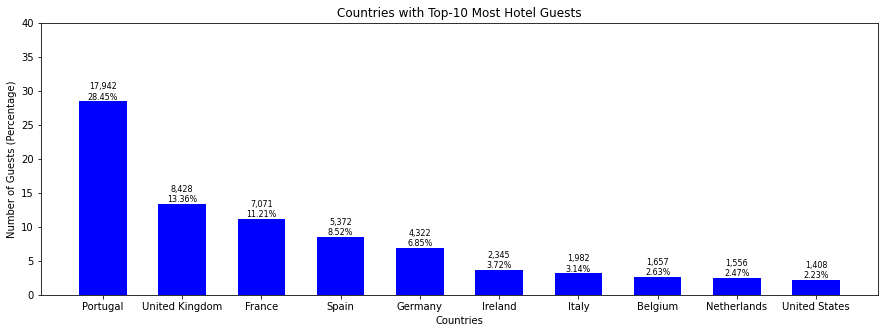

In [29]:
hotel_booking.country.replace(to_replace = '0 PRT', value = 'PRT',inplace=True)
hotel_booking.country.replace(to_replace = 'CN', value = 'CHN',inplace=True)
hotel_booking.to_csv('/content/drive/MyDrive/hotel_booking_cleaned_further.csv',index=False)
bf = hotel_booking.drop((hotel_booking.index[hotel_booking[['is_canceled']].sum(axis=1)==1]))
clean = bf[['country']]
#----------
z = pd.DataFrame(clean.country.value_counts().reset_index().values, columns=["country", "NumGuests"])
df = z.sort_index(axis = 0, ascending=True).head(10)
# add country name by use pycountry 
df['country_name'] = df.country.apply(lambda x: pycountry.countries.get(alpha_3=x).name)
df['NumGuests_percent'] = df['NumGuests'] / len(clean) * 100
# Plot 
fig, ax = plt.subplots(figsize=(15,5))
plz = ax.bar(df['country_name'], df['NumGuests_percent'],width=0.6,color='b')
ax.set(title="Countries with Top-10 Most Hotel Guests",
       xlabel="Countries",
       ylabel="Number of Guests (Percentage)",
       ylim=([0,40]));
i=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:.2f}%".format(df['NumGuests_percent'].values[i]), (x+width/2,height),ha='center',va='bottom',fontsize=8,color='black')
    i+=1
j=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:,}".format(df['NumGuests'].values[j]), (x+width/2,height+1.5),ha='center',va='bottom',fontsize=8,color='black')
    j+=1
print(df)
plt.show()

 ## Exploratory Data Analysis (Part II)

In [31]:
df = pd.read_csv('/content/drive/MyDrive/hotel_booking_cleaned_further.csv')

In [32]:
df = df.drop((df.index[df[['is_canceled']].sum(axis=1)==1]))
bf = df[(df['reservation_status']=='Check-Out') & (df.stays_in_week_nights==0) & (df.stays_in_weekend_nights==0)]
print("Before, there are", len(bf) ,"rows corresponding to checked-in bookings but with total number of nights stayed equal to 0.")

df = df.drop(df[(df['reservation_status']=='Check-Out') & (df.stays_in_week_nights==0) & (df.stays_in_weekend_nights==0)].index)
af = df[(df['reservation_status']=='Check-Out') & (df.stays_in_week_nights==0) & (df.stays_in_weekend_nights==0)]

print("After, there are",len(af) ,"rows corresponding to checked-in bookings but with total number of nights stayed equal to 0.")

Before, there are 568 rows corresponding to checked-in bookings but with total number of nights stayed equal to 0.
After, there are 0 rows corresponding to checked-in bookings but with total number of nights stayed equal to 0.


#### Find the busiest month for hotels

Based on the total number of bookings August is the busiest month for hotel business.

Hotel Booking (Confirmed Only) By Months (Sorted by Calender Months):
  arrival_date_month  City Hotel  Resort Hotel  NumBookings  NumBookingPercent
             January        1931          1657         3588           5.741076
            February        2580          2027         4607           7.371554
               March        3443          2161         5604           8.966830
               April        3303          2149         5452           8.723619
                 May        3636          2212         5848           9.357249
                June        3459          1903         5362           8.579612
                July        3795          2974         6769          10.830920
              August        4431          3120         7551          12.082180
           September        3148          1867         5015           8.024385
             October        3017          2168       

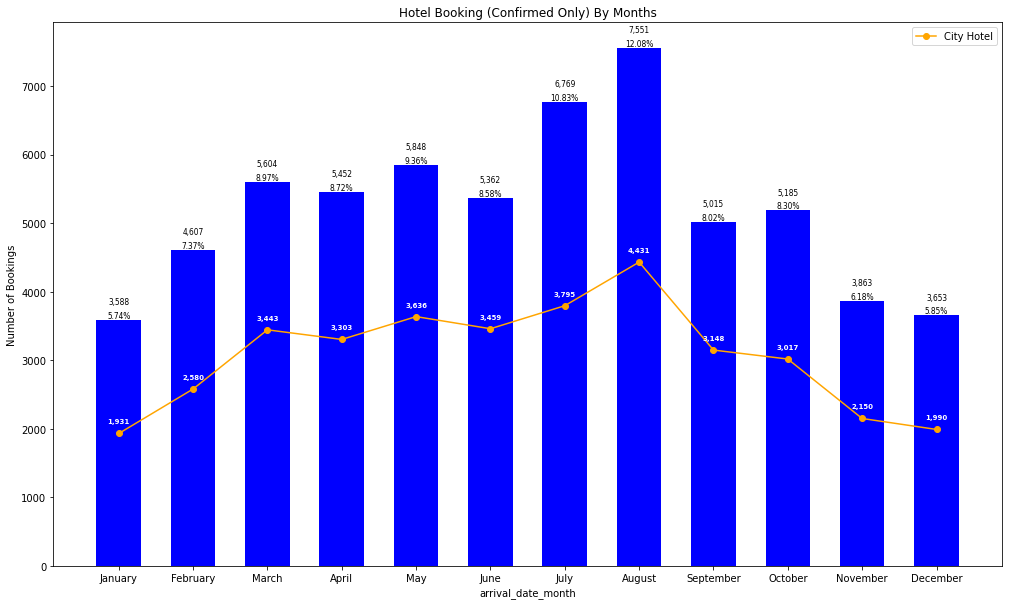

In [33]:
rh = df.loc[(df["hotel"] == "Resort Hotel")]
ch = df.loc[(df["hotel"] == "City Hotel")]
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()
cr = city_guests_monthly.values+resort_guests_monthly.values
t = df.groupby("arrival_date_month")["hotel"].count().sum()
m2 = pd.DataFrame({
 'arrival_date_month' : (resort_guests_monthly.index),
 'City Hotel' : (city_guests_monthly.values),
 'Resort Hotel' : (resort_guests_monthly.values),
 'NumBookings' : (cr),
 'NumBookingPercent':(cr/t*100)}, index = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
m2["arrival_date_month"] = pd.Categorical(m2["arrival_date_month"], categories=months, ordered=True)
m2 = m2.sort_values(by = "arrival_date_month")
#plot
fig, ax = plt.subplots(figsize=(17,10))
plz = ax.bar(months, m2.NumBookings,width=0.6,color='b')
ax.set(title="Hotel Booking (Confirmed Only) By Months",
       xlabel="arrival_date_month",
       ylabel="Number of Bookings")
w = plt.plot(months, m2['City Hotel'], color = 'orange', marker = 'o')
plt.legend(['City Hotel'],loc='upper right')
i=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:.2f}%".format(m2.NumBookings[i]/t*100), (x+width/2,height),ha='center',va='bottom',fontsize=7.5,color='black')
    i+=1
j=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:,}".format(m2.NumBookings[j]), (x+width/2,height+200),ha='center',va='bottom',fontsize=7.5,color='black')
    j+=1
for x,y in zip(months, m2['City Hotel']):
  label = "{:,}".format(y)
  plt.annotate(label,
               (x,y),
               textcoords="offset points",
               xytext=(0,10),
               ha = 'center', fontsize = 7, color = 'white', weight = 'bold')
#---busiest month
mydict = {}
for A, B in zip(months, m2['City Hotel']):
    mydict[A] = B
max_value = max(mydict, key=mydict.get)
print('Based on the total number of bookings', max_value,'is the busiest month for hotel business.')
print("\nHotel Booking (Confirmed Only) By Months (Sorted by Calender Months):")
print(m2)
plt.show()

#### Compute how long people stay in hotels.

Most of bookings stay for one, two, three or four nights.
75.72 percents fall into these durations of stay. 

    stay_in_total_nights  Numbookings  Numbookings_percent
0                      1        13975            22.361073
1                      2        11505            18.408884
2                      3        12445            19.912956
3                      4         9396            15.034322
4                      5         4664             7.462758
5                      6         2131             3.409764
6                      7         5208             8.333200
7                      8          662             1.059251
9                     10          736             1.177657
13                    14          636             1.017649


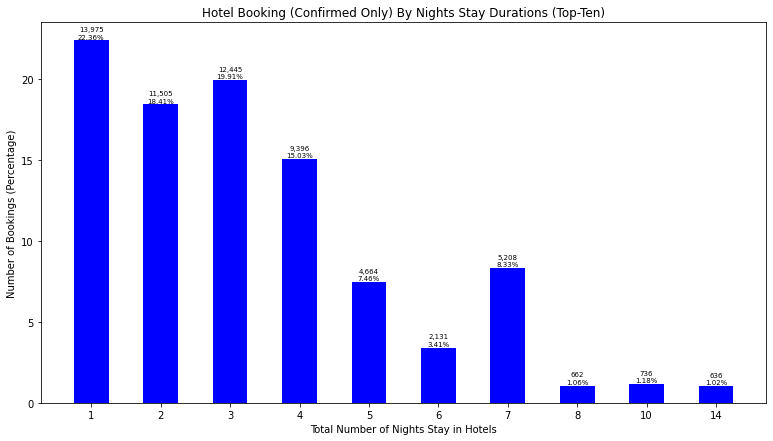

In [34]:
stay = df.groupby(df.stays_in_week_nights + df.stays_in_weekend_nights).size().reset_index(name='Numbookings')
stay.rename(columns = {'index':'stay_in_total_nights'}, inplace = True)
sdf = stay.sort_values(by='Numbookings',ascending=False).head(10)
sdf = sdf.sort_values(by='stay_in_total_nights',ascending=True).head(10)
t = stay.Numbookings.sum()
sdf['Numbookings_percent'] = sdf['Numbookings'] / t*100
#------
r = sdf['stay_in_total_nights'].tolist()
fig, ax = plt.subplots(figsize=(13,7))
plz = ax.bar(np.array([str(x) for x in r]),sdf['Numbookings_percent'],width=0.5,color='b',align='center')
ax.set(title="Hotel Booking (Confirmed Only) By Nights Stay Durations (Top-Ten)",
       xlabel="Total Number of Nights Stay in Hotels",
       ylabel="Number of Bookings (Percentage)")
plt.xticks(np.array([str(x) for x in r]))
i=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:.2f}%".format(sdf['Numbookings_percent'].values[i]), (x+width/2,height+0.05),ha='center',va='bottom',fontsize=7,color='black')
    i+=1
j=0
for rect1 in plz:
    height = rect1.get_height()
    width = rect1.get_width()
    x, y = rect1.get_xy()
    plt.annotate("{:,}".format(sdf['Numbookings'].values[j]), (x+width/2,height+0.5),ha='center',va='bottom',fontsize=7,color='black')
    j+=1
k = np.arange(4)
fo = round(sdf['Numbookings_percent'].values[k].sum(),2)
print('Most of bookings stay for one, two, three or four nights.')
print(fo,'percents fall into these durations of stay. \n')
print(sdf)
plt.show()

#### Analyze hotel stay durations in more details.

                           stays_in_weekend_nights  stays_in_week_nights
total_nights hotel                                                      
1            City Hotel                       1891                  6059
             Resort Hotel                     1355                  4670
2            City Hotel                       3793                 11421
             Resort Hotel                     1893                  5903
3            City Hotel                       7874                 19918
             Resort Hotel                     2464                  7079
4            City Hotel                       7398                 18586
             Resort Hotel                     3207                  8393
5            City Hotel                       4416                 10009
             Resort Hotel                     2451                  6444
6            City Hotel                       1728                  4386
             Resort Hotel                     1870 

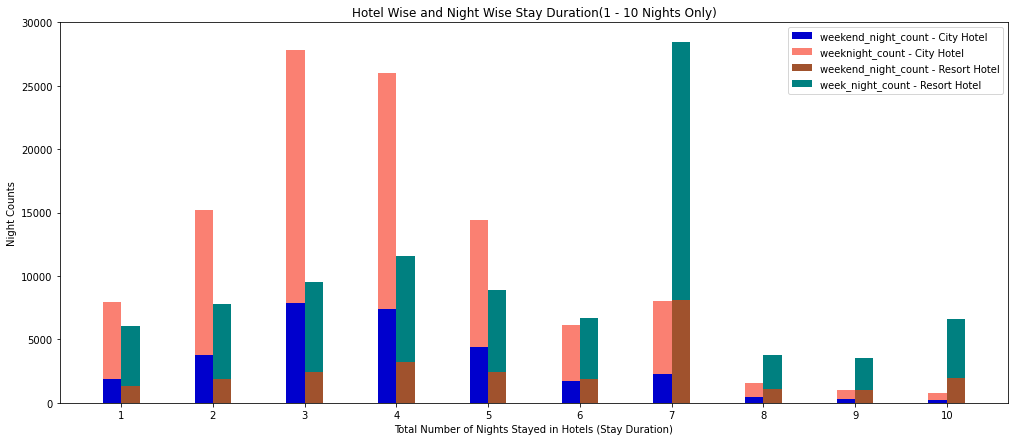

In [35]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
showdf = df.groupby(['total_nights', 'hotel'])[['stays_in_weekend_nights','stays_in_week_nights']].agg('sum').head(20)

cwk = df.groupby(['total_nights']).apply(lambda x: x[x['hotel'] == 'City Hotel' ]['stays_in_weekend_nights'].sum()).head(10)
cw= df.groupby(['total_nights']).apply(lambda x: x[x['hotel'] == 'City Hotel' ]['stays_in_week_nights'].sum()).head(10)
rwk = df.groupby(['total_nights']).apply(lambda x: x[x['hotel'] == 'Resort Hotel' ]['stays_in_weekend_nights'].sum()).head(10)
rw= df.groupby(['total_nights']).apply(lambda x: x[x['hotel'] == 'Resort Hotel' ]['stays_in_week_nights'].sum()).head(10)

res = pd.DataFrame({"hotel": "Resort hotel", 
                    "wk": rwk, 
                    "w": rw})
cty = pd.DataFrame({"hotel": "City hotel", 
                    "wk": cwk, 
                    "w": cw})
#Plot
ind = np.array([str(x) for x in np.arange(1,11)])
fig,ax = plt.subplots(figsize=(17, 7))
c1 = ax.bar(ind, cty.wk, align='edge',width= -0.2,color='mediumblue',label='weekend_night_count - City Hotel')
c2 = ax.bar(ind, cty.w, align='edge',width= -0.2,bottom=cty.wk,color='salmon',label='weeknight_count - City Hotel')
r1 = ax.bar(ind, res.wk, align='edge', width= 0.2,color='sienna',label='weekend_night_count - Resort Hotel')
r2 = ax.bar(ind, res.w, align='edge', width= 0.2,bottom=res.wk,color='teal',label='week_night_count - Resort Hotel')
ax.set(title="Hotel Wise and Night Wise Stay Duration(1 - 10 Nights Only)",
       xlabel="Total Number of Nights Stayed in Hotels (Stay Duration)",
       ylabel="Night Counts",
       ylim=(0,30000))
ax.legend(loc='upper right')
print(showdf)
plt.show()